In [6]:
import numpy as np
import cirq
import sympy
import qutip as qt


In [7]:
a = sympy.Symbol("a")
x = sympy.Symbol("x")
z = sympy.Symbol("z")

noise = cirq.PhasedXZGate(x_exponent=x, z_exponent=z, axis_phase_exponent=a)
circ = cirq.Circuit(noise.on(cirq.LineQubit(0)))
print(circ)

0: ───PhXZ(a=a,x=x,z=z)───


In [8]:
n_random = 100
amplitude = 10
random_a = np.random.normal(loc=-1, scale=1, size=n_random)
random_x = np.random.normal(loc=0, scale=amplitude, size=n_random)
random_z = np.random.normal(loc=0, scale=amplitude, size=n_random)
circuits = [
    cirq.resolve_parameters(circ, {a: random_a[i], x: random_x[i], z: random_z[i]})
    for i in range(n_random)
]

In [9]:
import qsimcirq

sim = qsimcirq.QSimSimulator()
result_states = []
for circuit in circuits:
    result = sim.simulate(circuit)
    result_states.append(result.final_state_vector)


In [5]:
circuit = circuits[0]
sim = qsimcirq.QSimSimulator()
# sim = cirq.Simulator()
its = sim.simulate_moment_steps(circuit)
step = next(its)
step.state_vector(copy=True)

AttributeError: 'QSimSimulator' object has no attribute 'simulate_moment_steps'

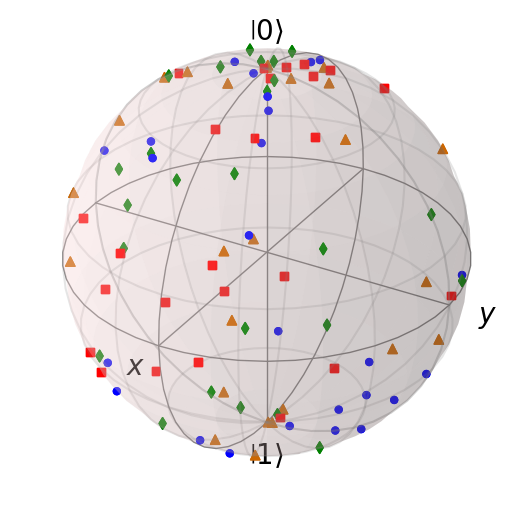

In [10]:
bloch = qt.Bloch()
qobj_states = [qt.Qobj(state) for state in result_states]
bloch.add_states(qobj_states, kind='point')
bloch.show()